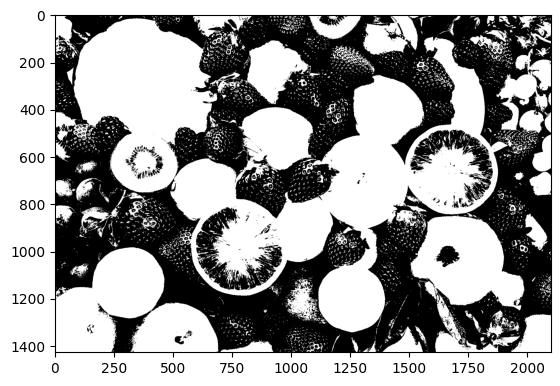

In [1]:
#2.1.1
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu (a)
# pixels with intensity greater than theshold are kept
b = a > thres
b = Image.fromarray (b)
plt.imshow(b)
plt.show()

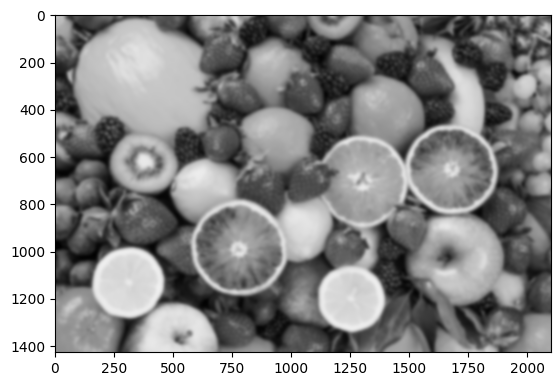

In [2]:
#2.1.2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
a = np.asarray (data)
# performing local thresholding
b = threshold_local (a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow (b)
plt.show ()

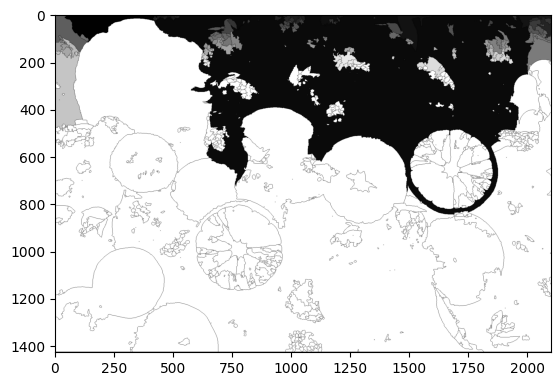

In [4]:
#2.2
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')
# covnerting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode (bl, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform (b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold (dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label (dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype (np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray (labelled)
plt.imshow (b)
plt.show ()


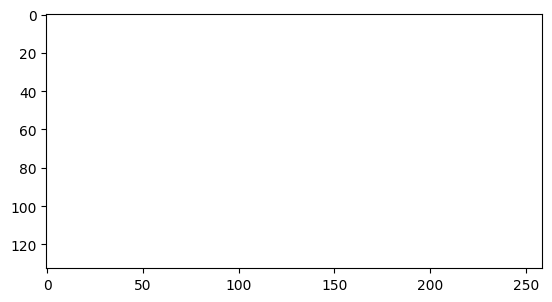

In [7]:
#2.3.1
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('dil img.png').convert('L')
b = nd.binary_dilation(data, iterations=50)
c= Image.fromarray(b)
c.show()
plt.imshow (c)
plt.show ()


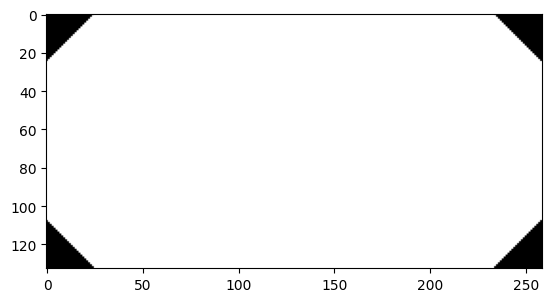

In [11]:
#2.3.2
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('dil img.png').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening (data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show ()
plt.imshow(c)
plt.show ()

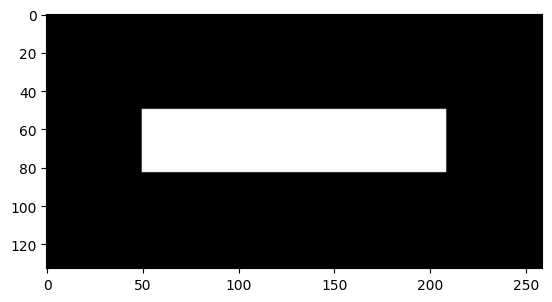

In [2]:
#2.3.3
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
#opening the image and converting it to grayscale
data = Image.open('dil img.png').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)
c = Image.fromarray (b)
c.show()
plt.imshow (c)
plt.show ()


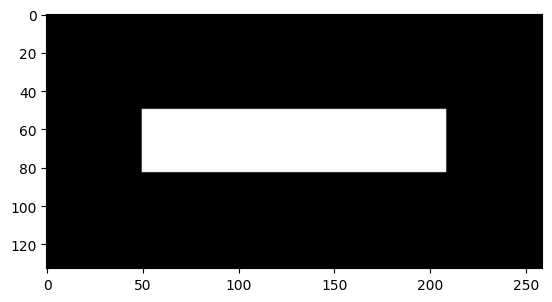

In [4]:
#2.3.4
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as np
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# opening the image and converting it to grayscale
data = Image.open('dil img.png').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing (data, structure=s, iterations=50)
c= Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()

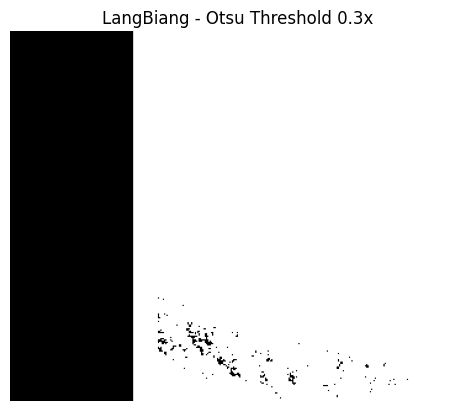

In [2]:
#Bài 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread("exercise/dalat.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
langbiang_crop = img_rgb[0:300, 0:370]
rows, cols, _ = langbiang_crop.shape
translated_img = np.zeros_like(langbiang_crop)
if cols + 100 <= img_rgb.shape[1]:
    translated_img[:, 100:] = langbiang_crop[:, :cols - 100]

gray = cv2.cvtColor(translated_img, cv2.COLOR_RGB2GRAY)

otsu_thresh, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adjusted_thresh = otsu_thresh * 0.3

_, binary_img = cv2.threshold(gray, adjusted_thresh, 255, cv2.THRESH_BINARY)

output = Image.fromarray(binary_img)
output.save("lang_biang.jpg")

plt.imshow(binary_img, cmap='gray')
plt.title("LangBiang - Otsu Threshold 0.3x")
plt.axis('off')
plt.show()


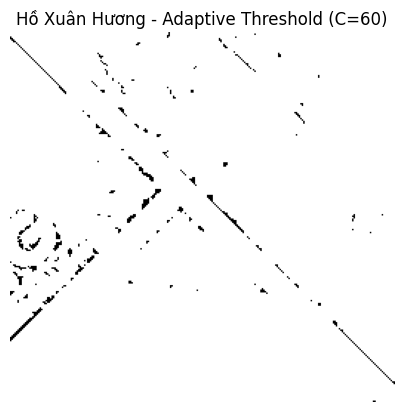

In [3]:
#Bài 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = cv2.imread("exercise/dalat.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ho_crop = img_rgb[250:500, 370:630]
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = rotate_image(ho_crop, 45)
gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)
adaptive = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY,
    11, 
    60   
)
output = Image.fromarray(adaptive)
output.save("ho_xuan_huong.jpg")
plt.imshow(adaptive, cmap='gray')
plt.title("Hồ Xuân Hương - Adaptive Threshold (C=60)")
plt.axis('off')
plt.show()


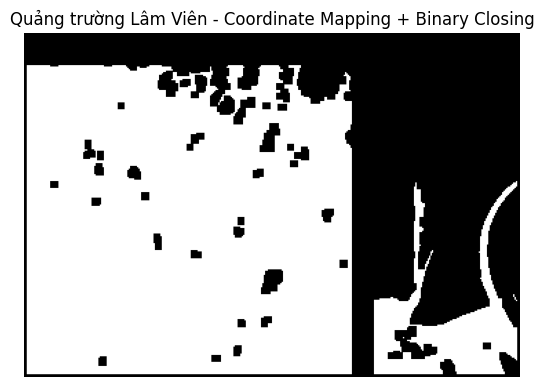

In [5]:
#Bài 3
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import binary_closing
img = cv2.imread("exercise/dalat.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lam_vien_crop = img_rgb[0:250, 750:1110]
gray = cv2.cvtColor(lam_vien_crop, cv2.COLOR_RGB2GRAY)
mapped = 255 - gray 
_, binary = cv2.threshold(mapped, 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), dtype=bool)
closed = binary_closing(binary, structure=kernel)
closed_img = (closed * 255).astype(np.uint8)
output = Image.fromarray(closed_img)
output.save("quan_truong_lam_vien.jpg")
plt.imshow(closed_img, cmap='gray')
plt.title("Quảng trường Lâm Viên - Coordinate Mapping + Binary Closing")
plt.axis('off')
plt.show()


=== MENU XỬ LÝ HÌNH ẢNH ===
geometric_transformation: [coordinate_mapping, rotate, scale, shift]
segment: [adaptive_threshold, binary_dilation, binary_erosion, otsu]
Bạn có thể chọn 1 hoặc kết hợp 2 chức năng (cách nhau bởi dấu phẩy)



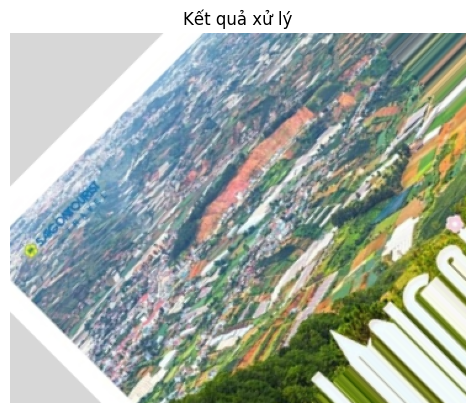

In [6]:
#Bài 4
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation, binary_closing
from PIL import Image
def coordinate_mapping(image):
    return 255 - image

def rotate(image, angle=45):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_REPLICATE)

def scale(image, fx=1.2, fy=1.2):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

def shift(image, dx=30, dy=30):
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    rows, cols = image.shape[:2]
    return cv2.warpAffine(image, M, (cols, rows))

def adaptive_threshold(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 5)

def binary_dilation_func(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, bin_img = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    dilated = binary_dilation(bin_img, structure=np.ones((5, 5)))
    return (dilated * 255).astype(np.uint8)

def binary_erosion_func(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, bin_img = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    eroded = binary_erosion(bin_img, structure=np.ones((5, 5)))
    return (eroded * 255).astype(np.uint8)

def otsu(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    otsu_thresh, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return cv2.threshold(gray, otsu_thresh * 0.3, 255, cv2.THRESH_BINARY)[1]

print("=== MENU XỬ LÝ HÌNH ẢNH ===")
print("geometric_transformation: [coordinate_mapping, rotate, scale, shift]")
print("segment: [adaptive_threshold, binary_dilation, binary_erosion, otsu]")
print("Bạn có thể chọn 1 hoặc kết hợp 2 chức năng (cách nhau bởi dấu phẩy)\n")
user_input = input("Nhập lựa chọn (vd: rotate,otsu hoặc chỉ: scale): ").strip().lower()
choices = [x.strip() for x in user_input.split(",")]
img = cv2.imread("exercise/dalat.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sample_crop = img_rgb[0:300, 0:370] 
result = sample_crop.copy()
for choice in choices:
    if choice == "coordinate_mapping":
        result = coordinate_mapping(cv2.cvtColor(result, cv2.COLOR_RGB2GRAY))
    elif choice == "rotate":
        result = rotate(result, angle=45)
    elif choice == "scale":
        result = scale(result, fx=1.2, fy=1.2)
    elif choice == "shift":
        result = shift(result, dx=50, dy=30)
    elif choice == "adaptive_threshold":
        result = adaptive_threshold(result)
    elif choice == "binary_dilation":
        result = binary_dilation_func(result)
    elif choice == "binary_erosion":
        result = binary_erosion_func(result)
    elif choice == "otsu":
        result = otsu(result)
    else:
        print(f"Không nhận diện được lựa chọn: {choice}")

if isinstance(result, np.ndarray) and result.ndim == 2:
    plt.imshow(result, cmap='gray')
else:
    plt.imshow(result)

plt.title("Kết quả xử lý")
plt.axis('off')
plt.show()
